In [ ]:
import torch 
from torch import nn 

#checking version 
torch.__version__

'2.0.0+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device
#checking if we have a gpu 


'cpu'

In [ ]:
#getting data 
import requests
import zipfile 
from pathlib import Path
import os


#Setup path to a datafolder
data_path =  Path("data/")
image_path = data_path / "rock_paper_scissors"


#If the image folder doesn't exist then download and prepare it ...
if image_path.is_dir():
    print(f"{image_path} directory already exists ... skipping download")
else :
  print(f"{image_path} does not exist, creating one ... ")
  image_path.mkdir(parents = True, exist_ok = True)

#Download the data in Rock_Paper_Scissors 
with open(data_path / "Rock_Paper_Scissors.zip" , "wb") as f:
  request = requests.get("https://github.com/Gurjas08/Datasets/raw/main/Rock_Paper_Scissors.zip") #new public repository for the dataset
  print("Downloading rock paper scissors data ....")
  f.write(request.content)

#Unzip the file 
with zipfile.ZipFile(data_path / "Rock_Paper_Scissors.zip" , "r" ) as zip_ref:
  print("Unzipping")
  zip_ref.extractall(image_path)

data/rock_paper_scissors does not exist, creating one ... 
Unzipping


In [ ]:
import os 
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/rock_paper_scissors' .
There are 3 directories and 0 images in 'data/rock_paper_scissors/train' .
There are 0 directories and 75 images in 'data/rock_paper_scissors/train/rock' .
There are 0 directories and 75 images in 'data/rock_paper_scissors/train/scissors' .
There are 0 directories and 75 images in 'data/rock_paper_scissors/train/paper' .
There are 3 directories and 0 images in 'data/rock_paper_scissors/test' .
There are 0 directories and 25 images in 'data/rock_paper_scissors/test/rock' .
There are 0 directories and 25 images in 'data/rock_paper_scissors/test/scissors' .
There are 0 directories and 25 images in 'data/rock_paper_scissors/test/paper' .


In [ ]:
#Setup train and test paths 

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/rock_paper_scissors/train'),
 PosixPath('data/rock_paper_scissors/test'))

In [ ]:
#Pre Processing
import numpy as np 
import os 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR1 = "data/rock_paper_scissors/train"
DATADIR2 = "data/rock_paper_scissors/test"
CATEGORIES = ['paper' , 'rock' , 'scissors']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label the encoding values
  
  path1 = os.path.join(DATADIR1, category) # Create a path to use the images
  path2 = os.path.join(DATADIR2,category)
  for img in os.listdir(path1):
    img_array = imread(os.path.join(path1, img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

  for img in os.listdir(path2):
    img_array = imread(os.path.join(path2, img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

In [ ]:
#Split into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.25, random_state=109)

In [ ]:
#This can take a few mins (7mins)
from sklearn.model_selection import GridSearchCV
from sklearn import svm 

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1])

In [ ]:
y_test

array([0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix  

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[31,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 21]])

In [ ]:
# Save the model using Pickle library

import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

In [ ]:
model = pickle.load(open("img_model.p" , 'rb'))

Enter your urlhttps://media.geeksforgeeks.org/wp-content/uploads/20210705223645/paper.jpeg
(512, 512, 3)
PREDICTED OUTPUT : paper


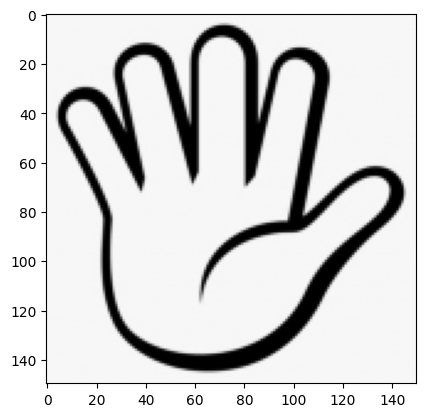

In [ ]:
# Testing a brand new image
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')


In [ ]:
!pip install Streamlit
!pip install pyngrok 
from pyngrok import ngrok 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=01b0ac15184569ef6b6953a608f9825ca83c6b62dd894d1a48c96ce11f9e4728
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [ ]:
%%writefile app.py
import streamlit as st 
import numpy as np 
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using machine learning')
st.text('Upload the image')

model = pickle.load(open("img_model.p" , 'rb'))

uploaded_file = st.file_uploader("Choose an image ...." , type = "jpg")

if uploaded_file is not None :
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['paper' , 'rock' , 'scissors']
    st.write('Result .... ')
    flat_data=[]
    img=np.array(img)
    img_resized = resize(img,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT : {y_out}')




Overwriting app.py


In [ ]:
#!ngrok authtoken 2O1YmkbqGTblcJUD3PlKz6QMVhi_3omcf2H5SJrxiPtNYb3Sb

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
#!nohup streamlit run app.py &
#url = ngrok.connect(port = 8501)
#url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://b0a1-35-196-94-247.ngrok.io" -> "http://localhost:80">

In [ ]:
#ngrok.kill()

In [ ]:
#!cat nohup.out





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8515
  External URL: http://35.196.94.247:8515




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8516
  External URL: http://35.196.94.247:8516




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8517
  External URL: http://35.196.94.247:8517



In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.190.187.230:8501

npx: installed 22 in 3.68s
your url is: https://pretty-loops-teach-35-190-187-230.loca.lt
